In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
game_data = pd.read_csv('dataset_final.csv')
#game_data = game_data[['FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HomeTeam', 'AwayTeam','Referee']]
game_data.head()

,Div,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,...,2,6,12,12,2,3,2,2,0,0
1,E0,Crystal Palace,Southampton,1,0,H,1,0,H,Jj Moss,...,3,5,14,11,7,3,2,1,0,0
2,E0,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,...,6,3,9,6,9,0,1,0,0,0
3,E0,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,...,3,2,13,7,8,7,2,2,0,0
4,E0,West Brom,Leicester,0,3,A,0,0,D,A Taylor,...,1,7,12,9,2,5,1,1,0,0


In [46]:
game_data.shape

(7025, 22)

In [47]:
game_data.size

154550

In [48]:
game_data.count()

Div         7025
HomeTeam    7025
AwayTeam    7025
FTHG        7025
FTAG        7025
FTR         7025
HTHG        7025
HTAG        7025
HTR         7025
Referee     7025
HS          7025
AS          7025
HST         7025
AST         7025
HF          7025
AF          7025
HC          7025
AC          7025
HY          7025
AY          7025
HR          7025
AR          7025
dtype: int64

In [49]:
game_data['FTR'].value_counts()

H    3251
A    2019
D    1755
Name: FTR, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9170DA9E8>,
      dtype=object)

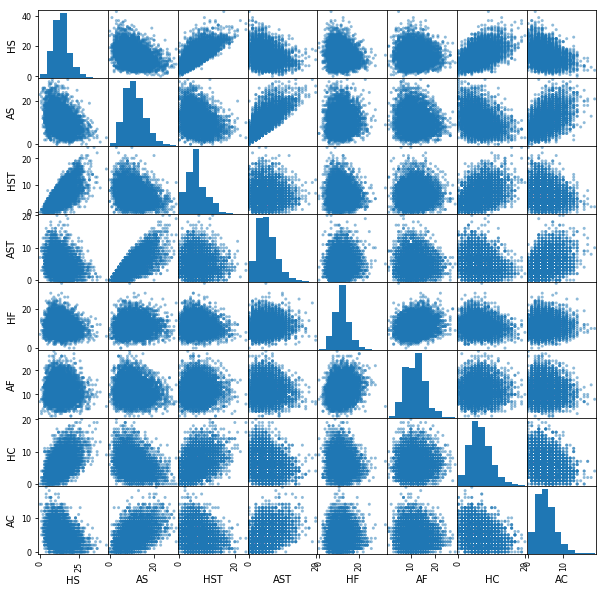

In [50]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix
scatter_matrix(game_data[['HS','AS','HST','AST','HF', 'AF', 'HC','AC']], figsize=(10,10))

In [51]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = game_data.drop(['FTR','Div','Referee','HomeTeam', 'AwayTeam'],1)
# X_all = game_data.drop(['FTR','HF','AF','HC','AC','HY','AY','HR','AR','Referee','Div'],1)
y_all = game_data['FTR']

In [53]:
X_all.head()

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,3,0,1,A,5,13,2,6,12,12,2,3,2,2,0,0
1,1,0,1,0,H,5,9,3,5,14,11,7,3,2,1,0,0
2,4,3,3,2,H,22,6,6,3,9,6,9,0,1,0,0,0
3,0,2,0,0,D,15,15,3,2,13,7,8,7,2,2,0,0
4,0,3,0,0,D,7,13,1,7,12,9,2,5,1,1,0,0


In [54]:
# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
# cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST']]
for col in cols:
    X_all[col] = scale(X_all[col])

C:\Users\JicchagSoltes\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [55]:
X_all.HTR = X_all.HTR.astype('str')
# X_all.HomeTeam = X_all.HomeTeam.astype('str')
# X_all.AwayTeam = X_all.AwayTeam.astype('str')
X_all.head()

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,-1.176674,1.622540,-0.821022,0.693658,A,-1.629135,0.495096,-1.250289,0.402499,0.195597,0.058439,-1.316625,-0.658040,0.491734,0.197337,-0.244862,-0.304153
1,-0.406298,-1.005825,0.380077,-0.697817,H,-1.629135,-0.373873,-0.955360,0.052770,0.735189,-0.201065,0.292843,-0.658040,0.491734,-0.590328,-0.244862,-0.304153
2,1.904830,1.622540,2.782275,2.085133,H,1.587893,-1.025600,-0.070573,-0.646686,-0.613791,-1.498585,0.936630,-1.754946,-0.352251,-1.377992,-0.244862,-0.304153
3,-1.176674,0.746418,-0.821022,-0.697817,D,0.263235,0.929580,-0.955360,-0.996415,0.465393,-1.239081,0.614736,0.804502,0.491734,0.197337,-0.244862,-0.304153
4,-1.176674,1.622540,-0.821022,-0.697817,D,-1.250661,0.495096,-1.545218,0.752227,0.195597,-0.720073,-1.316625,0.073231,-0.352251,-0.590328,-0.244862,-0.304153


In [56]:
#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (19 total features):
['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR_A', 'HTR_D', 'HTR_H', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']


In [57]:
# Show the feature information by printing the first five rows
print("\nFeature values:")
display(X_all.head())


Feature values:


,FTHG,FTAG,HTHG,HTAG,HTR_A,HTR_D,HTR_H,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,-1.176674,1.622540,-0.821022,0.693658,1,0,0,-1.629135,0.495096,-1.250289,0.402499,0.195597,0.058439,-1.316625,-0.658040,0.491734,0.197337,-0.244862,-0.304153
1,-0.406298,-1.005825,0.380077,-0.697817,0,0,1,-1.629135,-0.373873,-0.955360,0.052770,0.735189,-0.201065,0.292843,-0.658040,0.491734,-0.590328,-0.244862,-0.304153
2,1.904830,1.622540,2.782275,2.085133,0,0,1,1.587893,-1.025600,-0.070573,-0.646686,-0.613791,-1.498585,0.936630,-1.754946,-0.352251,-1.377992,-0.244862,-0.304153
3,-1.176674,0.746418,-0.821022,-0.697817,0,1,0,0.263235,0.929580,-0.955360,-0.996415,0.465393,-1.239081,0.614736,0.804502,0.491734,0.197337,-0.244862,-0.304153
4,-1.176674,1.622540,-0.821022,-0.697817,0,1,0,-1.250661,0.495096,-1.545218,0.752227,0.195597,-0.720073,-1.316625,0.073231,-0.352251,-0.590328,-0.244862,-0.304153


In [58]:

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.2,
                                                    random_state = 4,
                                                    stratify = y_all)
X_train.shape

(5620, 19)

In [59]:
from sklearn import svm


svc_classifier = svm.SVC(kernel='poly', gamma='auto', C=10)
svc_classifier.fit(X_train, y_train)

y_predict = svc_classifier.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       404
           D       0.99      1.00      1.00       351
           H       1.00      1.00      1.00       650

   micro avg       1.00      1.00      1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405



In [71]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_predict, labels=['A','H','D'])


array([[402,   0,   2],
       [  0, 650,   0],
       [  1,   0, 350]], dtype=int64)

In [62]:
metrics.accuracy_score(y_test, y_predict)

0.997864768683274

In [65]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [66]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7088967971530249


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.76      0.72      0.74       404
           D       0.47      0.59      0.53       351
           H       0.85      0.77      0.81       650

   micro avg       0.71      0.71      0.71      1405
   macro avg       0.69      0.69      0.69      1405
weighted avg       0.73      0.71      0.72      1405



In [70]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred, labels=['A','H','D'])

array([[291,  17,  96],
       [ 18, 498, 134],
       [ 75,  69, 207]], dtype=int64)